In [2]:
#cleaning drop all records of date due to many missing dates and drop 

### 2023 Conference Data Exploration


# March Madness Match Predictor
Authors: Peter Chacko (pic282), Imran Hussein (ih5296) Ethan Lopez (esl834),
Bidhan Devkota (bd25229)

## Introduction
What is the machine learning problem you are trying to solve:

Each year, the NCAA Men's College Basketball tournament (March Madness) gathers excitement and speculation from fans. Both casual and hard-core basketball fans compete to predict the outcome of each match, which frequently results in upsets. Our machine learning project aims to predict the outcome of a March Madness matchup using the data in the Kaggle.
 
Why does the problem matter?
 
 Every year, thousands of people submit their tournament bracket predictions toof our predictive model could be used for creating bracket challenges as basketball fans compete against each other in predicting the outcomes of each  contests for chances to win big prizes and bragging rights. At this point it has become college basketball culture and people take it very seriously. From the casual perspective, where people pick winners based on their favorite mascot, to more serious analytical perspectives where people leverage statistical patterns - we thought it would be interesting to take a machine learning approach. 
 
  What could the results of your predictive model be used for?

  Sports betting == Winning big

  The results 
  
Why would we want to be able to predict the thing you’re trying to predict? 

  Purely entertainment. 
   
Then describe the dataset that you will use to tackle this problem.


- 2023 Conference Data.csv
  - This dataset features the conferences and their stats from the 2022 - 2023 season. All of the stats given represent the average stats of the conference throughout the entire season including the conference tournaments. It also features how well each conference did in the tournament by featuring how many teams in that conference made it to the specific rounds as well.
  - Columns:
    - YEAR: The year where the data is pulled from. In this case, the year 2023 represents the 2022 - 2023 Division I college
    - B ADJ EM: Estimates how many points a conference would outscore the average Division I basketball team by over the course of 100
    - B ADJ O: Estimates how many points a conference would score against the average Division I basketball offense by over the
    - B ADJ D: Estimates how many points a conference would allow against the average Division I basketball defense by over the
    - BARTHAG: Power Rating (Chance of beating the average Division I basketball team).
    - WAB: The expected winning percentage for an average bubble team in each game of a team's schedule subtracted from
    - CONFERENCE NUMBER: Number to identify the conference.
- 2023 Game Data.csv
  - This dataset features several potential matchups for the 2023 tournament. It includes all First Round matchups, common Second Round matchups, and common Sweet 16 matchups. This dataset was created to predict the results of these specific matchups in my March Madness notebook. Every two rows represent a matchup. For example, the first two rows (Alabama and Grambling) represent a matchup between the two teams. The subsequent rows (Alabama and Howard) represent a matchup between another two teams and so on. All of the stats given represent the average stats of the team throughout the entire season including their conference tournament.
  - Columns:
    - YEAR
    - SEED
    - TEAM
    - TEAM ROUND
    - CURRENT ROUND
    - KENPOM ADJUSTED EFFICIENCY
    - KENPOM ADJUSTED OFFENSE
    - KENPOM ADJUSTED DEFENSE
    - KENPOM ADJUSTED TEMPO
    - BARTTORVIK ADJUSTED EFFICIENCY
    - BARTTORVIK ADJUSTED OFFENSE
    - BARTTORVIK ADJUSTED DEFENSE
    - BARTHAG
    - ELITE SOS
    - BARTTORVIK ADJUSTED TEMPO
    - 2PT %
    - 3PT %
    - FREE THROW %
    - EFG %
    - FREE THROW RATE
    - 3PT RATE
    - ASSIST %
    - OFFENSIVE REBOUND %
    - DEFENSIVE REBOUND %
    - BLOCK %
    - TURNOVER %
    - 2PT % DEFENSE
    - 3PT % DEFENSE
    - FREE THROW % DEFENSE
    - EFG % DEFENSE
    - FREE THROW RATE DEFENSE
    - 3PT RATE DEFENSE
    - OP ASSIST %
    - OP O REB %
    - OP D REB %
    - BLOCKED %
    - TURNOVER % DEFENSE
    - WINS ABOVE BUBBLE
    - WIN %
    - POINTS PER POSSESSION OFFENSE
    - POINTS PER POSSESSION DEFENSE
    - TEAM

- 2023 Tournament Data.csv
  -This dataset features the teams and their stats for the 2023 tournament. All of the stats given represent the average stats of the team throughout the entire season including their conference tournament.


- 2023 Tournament Trends.csv
  - This dataset features the teams and some specific stats for the 2023 tournament teams. All of the stats given represent the average stats of the team throughout the entire season including their conference tournament. The Points Per Game, Win % (Close Games), Away Win %, Neutral Win %, Away - Neutral Win %, and Scoring Margin stats pertain to the 2023 teams that are the top 11 seeds. The BADJ O Rank Difference and BADJ D Rank Difference pertain to the 2023 teams that have a differential of 30 or greater for offense / defense. The TOV % and TOV % Rank pertain to the 2023 teams that have a TOV % greater than or equal to 18 %. The 3PT % and 3PT % Defense pertain to the 2023 teams that shoot 33 % or below from 3.
  
- Game Data.csv
  - This dataset features the boxscores of all games since 2008 (including 2023). This includes the non-conference games, the conference games, the conference tournament games, and the national tournament games.

- Tournament Conference Data.csv
  - This dataset features the conferences and their stats from all tournaments since 2008. All of the stats given represent the average stats of the conference throughout the entire season including the conference tournaments. It also features how well each conference did in the tournament by featuring how many teams in that conference made it to the specific rounds as well.

- Tournament Game Data.csv
  - 

   
  - This dataset features several potential matchups for the 2023 tournament. It includes all First Round matchups, common Second Round matchups, and common Sweet 16 matchups. This dataset was created to predict the results of these specific matchups in my March Madness notebook. Every two rows represent a matchup. For example, the first two rows (Alabama and Grambling) represent a matchup between the two teams. The subsequent rows (Alabama and Howard) represent a matchup between another two teams and so on. All of the stats given represent the average stats of the team throughout the entire season including their conference tournament.
  
  
-Tournament Game Data.csv
  -This dataset features several potential matchups for past tournaments since 2008. It includes all First Round matchups, common Second Round matchups, and common Sweet 16 matchups. This dataset was created to predict the results of these specific matchups in my March Madness notebook. Every two rows represent a matchup. For example, the first two rows (Gonzaga and Georgia St.) represent a matchup between the two teams. The subsequent rows (Boise St. and Memphis) represent a matchup between another two teams and so on. All of the stats given represent the average stats of the team throughout the entire season including their conference tournament. 
tournament_game_data = pd.read_csv("data/Tournament Game Data.csv", na_values=[r'?'])
print("Tournament Game Data Null values:")
print(tournament_game_data.isnull().sum.max())
#cleaning drop all records of date due to many missing dates and drop 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
# Data Prep


conference_data_2023 = pd.read_csv("data/2023 Conference Data.csv", na_values=[r'?'])
print("Conference Data 2023 Null values:")
print(conference_data_2023.isnull().sum().max())

game_data_2023 = pd.read_csv("data/2023 Game Data.csv", na_values=[r'?'])
print("Game Data 2023 Null values:")
print(game_data_2023.isnull().sum().max())

tournament_data_2023 = pd.read_csv("data/2023 Tournament Data.csv", na_values=[r'?'])
print("Tournament Data 2023 Null values:")
print(tournament_data_2023.isnull().sum().mmax())


game_data = pd.read_csv("data/Game Data.csv", na_values=[r'?'])
print("Null values:")
print(game_data.isnull().sum())



### 2023 Conference Data Exploration


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [4]:
# Data Exploration in Regards to Past Tournament Data
tournament_game_data_2023 = pd.read_csv("data/Tournament Game Data.csv", na_values=[r'?'])
print(tournament_game_data_2023.head())

   YEAR  SEED         TEAM  TEAM ROUND  CURRENT ROUND  \
0  2022     1      Gonzaga          16             64   
1  2022    16  Georgia St.          64             64   
2  2022     8    Boise St.          64             64   
3  2022     9      Memphis          32             64   
4  2022     5  Connecticut          64             64   

   KENPOM ADJUSTED EFFICIENCY  KENPOM ADJUSTED OFFENSE  \
0                        33.0                    121.8   
1                         1.8                    101.5   
2                        16.4                    108.4   
3                        16.2                    110.4   
4                        19.3                    113.9   

   KENPOM ADJUSTED DEFENSE  KENPOM ADJUSTED TEMPO  \
0                     88.8                   72.5   
1                     99.7                   67.1   
2                     92.0                   64.6   
3                     94.1                   70.3   
4                     94.6                 

In [5]:
print("Tournamnet Data Record Count")
print(tournament_game_data_2023.shape)

print("Tournament Data Null Values:")
print(tournament_game_data_2023.isnull().sum().max())

Tournamnet Data Record Count
(1910, 44)
Tournament Data Null Values:
0


In [6]:
# I want to combine every game into a single record

tournament_game_matchups = pd.DataFrame()
for i, group in tournament_game_data_2023.groupby(tournament_game_data_2023.index // 2):
    game = group.iloc[0].append(group.iloc[1])
    tournament_game_matchups = tournament_game_matchups.append(game, ignore_index=True)

# Print the head of the new dataframe
print(tournament_game_matchups)
# Print the shape of the new dataframe, should be double columns half the rows
print(tournament_game_matchups.shape)

     YEAR  SEED         TEAM  TEAM ROUND  CURRENT ROUND  \
0    2022     1      Gonzaga          16             64   
1    2022     8    Boise St.          64             64   
2    2022     5  Connecticut          64             64   
3    2022     4     Arkansas           8             64   
4    2022     6      Alabama          64             64   
..    ...   ...          ...         ...            ...   
950  2023     1       Kansas           0              0   
951  2023     1      Alabama           0              0   
952  2023     1       Purdue           0              0   
953  2023     1      Houston           0              0   
954  2023     1       Kansas           0              0   

     KENPOM ADJUSTED EFFICIENCY  KENPOM ADJUSTED OFFENSE  \
0                       33.0000                  121.800   
1                       16.4000                  108.400   
2                       19.3000                  113.900   
3                       19.0000                  11

In [7]:
# Now we have double of each statistic, must do some basic data cleaning.
# Firstly, we should make the first 44 rows specify team 1, and the other team 2
tournament_game_matchups.rename(columns={"TEAM.1": "TEAM"}, inplace=True)
for i, col_name in enumerate(tournament_game_matchups.columns):
    if i < 44:
        tournament_game_matchups.columns.values[i] = tournament_game_matchups.columns.values[i].replace(" (TEAM 1)", "") + " (TEAM 1)"
    else: 
        tournament_game_matchups.columns.values[i] = tournament_game_matchups.columns.values[i].replace(" (TEAM 2)", "") + " (TEAM 2)"

print(tournament_game_matchups.columns)

Index(['YEAR (TEAM 1)', 'SEED (TEAM 1)', 'TEAM (TEAM 1)',
       'TEAM ROUND (TEAM 1)', 'CURRENT ROUND (TEAM 1)',
       'KENPOM ADJUSTED EFFICIENCY (TEAM 1)',
       'KENPOM ADJUSTED OFFENSE (TEAM 1)', 'KENPOM ADJUSTED DEFENSE (TEAM 1)',
       'KENPOM ADJUSTED TEMPO (TEAM 1)',
       'BARTTORVIK ADJUSTED EFFICIENCY (TEAM 1)',
       'BARTTORVIK ADJUSTED OFFENSE (TEAM 1)',
       'BARTTORVIK ADJUSTED DEFENSE (TEAM 1)', 'BARTHAG (TEAM 1)',
       'ELITE SOS (TEAM 1)', 'BARTTORVIK ADJUSTED TEMPO (TEAM 1)',
       '2PT % (TEAM 1)', '3PT % (TEAM 1)', 'FREE THROW % (TEAM 1)',
       'EFG % (TEAM 1)', 'FREE THROW RATE (TEAM 1)', '3PT RATE (TEAM 1)',
       'ASSIST % (TEAM 1)', 'OFFENSIVE REBOUND % (TEAM 1)',
       'DEFENSIVE REBOUND % (TEAM 1)', 'BLOCK % (TEAM 1)',
       'TURNOVER % (TEAM 1)', '2PT % DEFENSE (TEAM 1)',
       '3PT % DEFENSE (TEAM 1)', 'FREE THROW % DEFENSE (TEAM 1)',
       'EFG % DEFENSE (TEAM 1)', 'FREE THROW RATE DEFENSE (TEAM 1)',
       '3PT RATE DEFENSE (TEAM 1)', '

In [8]:
# There exist some duplicate and redundant values such as TEAM, YEAR, CURRENT ROUND, ID
# We will get rid of those now.

dropped_columns = ['YEAR (TEAM 1)', 'TEAM (TEAM 1)',
                    'TEAM ROUND (TEAM 1)', 'ID (TEAM 1)',
                    'TEAM (TEAM 1)',
                    'YEAR (TEAM 2)', 'TEAM (TEAM 2)',
                    'TEAM ROUND (TEAM 2)', 'ID (TEAM 2)',
                    'TEAM (TEAM 2)']
tournament_game_matchups = tournament_game_matchups.drop(columns=dropped_columns)

print(tournament_game_matchups.columns)

Index(['SEED (TEAM 1)', 'CURRENT ROUND (TEAM 1)',
       'KENPOM ADJUSTED EFFICIENCY (TEAM 1)',
       'KENPOM ADJUSTED OFFENSE (TEAM 1)', 'KENPOM ADJUSTED DEFENSE (TEAM 1)',
       'KENPOM ADJUSTED TEMPO (TEAM 1)',
       'BARTTORVIK ADJUSTED EFFICIENCY (TEAM 1)',
       'BARTTORVIK ADJUSTED OFFENSE (TEAM 1)',
       'BARTTORVIK ADJUSTED DEFENSE (TEAM 1)', 'BARTHAG (TEAM 1)',
       'ELITE SOS (TEAM 1)', 'BARTTORVIK ADJUSTED TEMPO (TEAM 1)',
       '2PT % (TEAM 1)', '3PT % (TEAM 1)', 'FREE THROW % (TEAM 1)',
       'EFG % (TEAM 1)', 'FREE THROW RATE (TEAM 1)', '3PT RATE (TEAM 1)',
       'ASSIST % (TEAM 1)', 'OFFENSIVE REBOUND % (TEAM 1)',
       'DEFENSIVE REBOUND % (TEAM 1)', 'BLOCK % (TEAM 1)',
       'TURNOVER % (TEAM 1)', '2PT % DEFENSE (TEAM 1)',
       '3PT % DEFENSE (TEAM 1)', 'FREE THROW % DEFENSE (TEAM 1)',
       'EFG % DEFENSE (TEAM 1)', 'FREE THROW RATE DEFENSE (TEAM 1)',
       '3PT RATE DEFENSE (TEAM 1)', 'OP ASSIST % (TEAM 1)',
       'OP O REB % (TEAM 1)', 'OP D REB %

In [9]:
# We have another issue, we do not want our label to be the score; however, instead, we want
# which team was the winner: Team 1 or Team 2
# Instead of score, we will replace column with 0-team 1 won or 1-team 2 won
tournament_game_matchups['RESULT'] = ''

for i, row in tournament_game_matchups.iterrows():
    if row["SCORE (TEAM 1)"] > row["SCORE (TEAM 2)"]:
        tournament_game_matchups.loc[i, 'RESULT'] = 0
    else:
        tournament_game_matchups.loc[i, 'RESULT'] = 1

print(tournament_game_matchups.head())

   SEED (TEAM 1)  CURRENT ROUND (TEAM 1)  KENPOM ADJUSTED EFFICIENCY (TEAM 1)  \
0              1                      64                                 33.0   
1              8                      64                                 16.4   
2              5                      64                                 19.3   
3              4                      64                                 19.0   
4              6                      64                                 17.4   

   KENPOM ADJUSTED OFFENSE (TEAM 1)  KENPOM ADJUSTED DEFENSE (TEAM 1)  \
0                             121.8                              88.8   
1                             108.4                              92.0   
2                             113.9                              94.6   
3                             111.1                              92.1   
4                             116.1                              98.7   

   KENPOM ADJUSTED TEMPO (TEAM 1)  BARTTORVIK ADJUSTED EFFICIENCY (TEAM 1)

In [10]:
# In our actual training data, we do not want the scores to be accounted for, as it will not
# be part of our predictive data. We will drop those columns.
tournament_game_matchups = tournament_game_matchups.drop(columns=['SCORE (TEAM 1)', 'SCORE (TEAM 2)'])

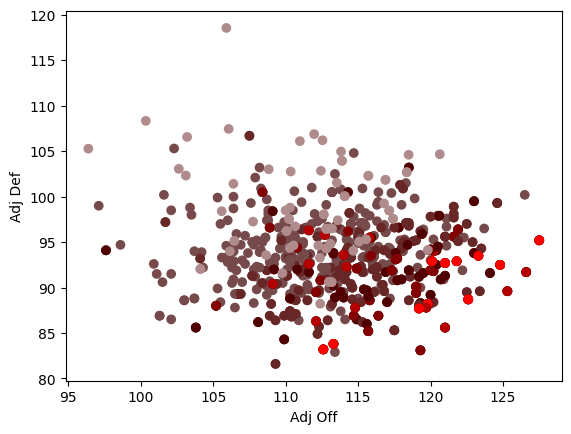

In [11]:
# Now a lot of our simple data cleaning has been done, let's do some data exploration
# Lets explore some trends in overall tournament winners

# First we will plot winners (overall) adjusted offense/adjusted defense ratings
team1_b_adj_off = tournament_game_matchups.loc[np.where(tournament_game_matchups["RESULT"] == 0, True, False), "BARTTORVIK ADJUSTED OFFENSE (TEAM 1)"].tolist()
team2_b_adj_off = tournament_game_matchups.loc[np.where(tournament_game_matchups["RESULT"] == 1, True, False), "BARTTORVIK ADJUSTED OFFENSE (TEAM 2)"].tolist()
winners_b_adj_off = team1_b_adj_off + team2_b_adj_off

team1_b_adj_def = tournament_game_matchups.loc[np.where(tournament_game_matchups["RESULT"] == 0, True, False), "BARTTORVIK ADJUSTED DEFENSE (TEAM 1)"].tolist()
team2_b_adj_def = tournament_game_matchups.loc[np.where(tournament_game_matchups["RESULT"] == 1, True, False), "BARTTORVIK ADJUSTED DEFENSE (TEAM 2)"].tolist()
winners_b_adj_def = team1_b_adj_def + team2_b_adj_def

team1_round = tournament_game_matchups.loc[np.where(tournament_game_matchups["RESULT"] == 0, True, False), "CURRENT ROUND (TEAM 1)"].tolist()
team2_round = tournament_game_matchups.loc[np.where(tournament_game_matchups["RESULT"] == 1, True, False), "CURRENT ROUND (TEAM 2)"].tolist()
winners_round = team1_round + team2_round


# Set up plotting by colors
colors = { 0:"#af8b8b", 64: "#764a4a", 32: "#672727", 16: "#500000", 8: "#840000", 4: "#b40000", 2: "#ff0000"}
round_colors = [colors[round] for round in winners_round]

# Now we plot
plt.scatter(winners_b_adj_off, winners_b_adj_def, c=round_colors)
plt.xlabel("Adj Off")
plt.ylabel("Adj Def")
plt.show()

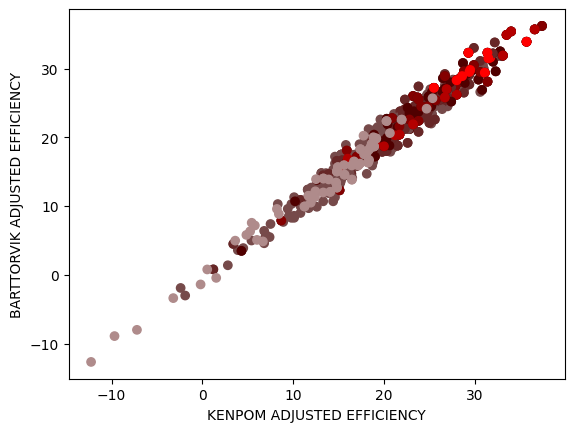

In [12]:
# First we will plot winners (overall) adjusted offense/adjusted defense ratings
team1_adj_eff_k = tournament_game_matchups.loc[np.where(tournament_game_matchups["RESULT"] == 0, True, False), 'KENPOM ADJUSTED EFFICIENCY (TEAM 1)'].tolist()
team2_adj_eff_k = tournament_game_matchups.loc[np.where(tournament_game_matchups["RESULT"] == 1, True, False), 'KENPOM ADJUSTED EFFICIENCY (TEAM 2)'].tolist()
winners_adj_eff_k = team1_adj_eff_k + team2_adj_eff_k

team1_adj_eff_b = tournament_game_matchups.loc[np.where(tournament_game_matchups["RESULT"] == 0, True, False), 'BARTTORVIK ADJUSTED EFFICIENCY (TEAM 1)'].tolist()
team2_adj_eff_b = tournament_game_matchups.loc[np.where(tournament_game_matchups["RESULT"] == 1, True, False), 'BARTTORVIK ADJUSTED EFFICIENCY (TEAM 2)'].tolist()
winners_adj_eff_b = team1_adj_eff_b + team2_adj_eff_b

# Now we plot
plt.scatter(winners_adj_eff_k, winners_adj_eff_b, c=round_colors)
plt.xlabel("KENPOM ADJUSTED EFFICIENCY")
plt.ylabel("BARTTORVIK ADJUSTED EFFICIENCY")
plt.show()

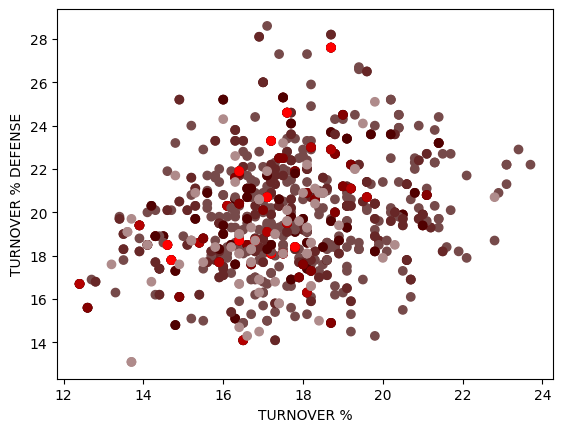

In [13]:
# First we will plot winners (overall) adjusted offense/adjusted defense ratings
team1_turnover_percentage = tournament_game_matchups.loc[np.where(tournament_game_matchups["RESULT"] == 0, True, False), 'TURNOVER % (TEAM 1)'].tolist()
team2_turnover_percentage = tournament_game_matchups.loc[np.where(tournament_game_matchups["RESULT"] == 1, True, False), 'TURNOVER % (TEAM 2)'].tolist()
winners_turnover_percentage = team1_turnover_percentage + team2_turnover_percentage

team1_turnover_defensive_percentage = tournament_game_matchups.loc[np.where(tournament_game_matchups["RESULT"] == 0, True, False), 'TURNOVER % DEFENSE (TEAM 1)'].tolist()
team2_turnover_defensive_percentage = tournament_game_matchups.loc[np.where(tournament_game_matchups["RESULT"] == 1, True, False), 'TURNOVER % DEFENSE (TEAM 2)'].tolist()
winners_turnover_defensive_percentage = team1_turnover_defensive_percentage + team2_turnover_defensive_percentage

# Now we plot
plt.scatter(winners_turnover_percentage, winners_turnover_defensive_percentage, c=round_colors)
plt.xlabel("TURNOVER %")
plt.ylabel("TURNOVER % DEFENSE")
plt.show()

[2, 7, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1]


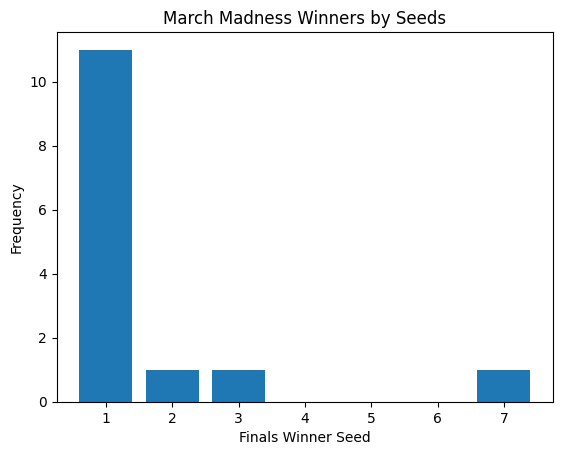

In [14]:
# Now i want to see what overall winners were ranked in seeding using a bar graph to keep count.
final_games = tournament_game_matchups[tournament_game_matchups["CURRENT ROUND (TEAM 1)"] == 2]

team1_seed = final_games.loc[np.where(final_games["RESULT"] == 0, True, False), 'SEED (TEAM 1)'].tolist()
team2_seed = final_games.loc[np.where(final_games["RESULT"] == 1, True, False), 'SEED (TEAM 2)'].tolist()
finals_winners_seeds = team1_seed + team2_seed

print(finals_winners_seeds)

# Use the "count" method of lists to count the frequency of each integer
counts = [finals_winners_seeds.count(i) for i in range(min(finals_winners_seeds), max(finals_winners_seeds)+1)]

# Create a bar graph with the frequency counts
plt.bar(range(min(finals_winners_seeds), max(finals_winners_seeds)+1), counts)
plt.xlabel('Finals Winner Seed')
plt.ylabel('Frequency')
plt.title('March Madness Winners by Seeds')
plt.show()

In [15]:
# Now we want to do a little more feature engineering.
# We know that conference data is really important in determing the overall evaulation of a teams skill.
# We want to stitch together data from Tournament Conference Data into our Tournament Game Data Records

# There is no dictionary, so we will have to manually create a dictionary to map team names to conferences.

In [94]:
# Start machine learning?
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

y_data = tournament_game_matchups['RESULT'].astype(int)
scaler = StandardScaler()
x_data = scaler.fit_transform(tournament_game_matchups.drop(['RESULT'],axis=1))

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.20)

lr = LogisticRegression(max_iter=5000)
lr.fit(x_data, y_data)
cv_scores = cross_val_score(lr, x_data, y_data, cv=5)

print("Cross-validation accuracy: {:.2f}%".format(cv_scores.mean() * 100))

pred_y= lr.predict(x_test)

print("Accuracy on test data is:: {:.2f}%".format(accuracy_score(y_test, pred_y)* 100))

Cross-validation accuracy: 61.05%
Accuracy on test data is:: 77.49%


In [25]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10)
rf.fit(x_data, y_data)
cv_scores = cross_val_score(rf, x_data, y_data, cv=5)

print("Cross-validation accuracy: {:.2f}%".format(cv_scores.mean() * 100))

pred_y= rf.predict(x_test)

print("Accuracy on test data is:: {:.2f}%".format(accuracy_score(y_test, pred_y)* 100))

Cross-validation accuracy: 51.73%
Accuracy on test data is:: 98.95%


In [18]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=3)
clf = clf.fit(x_data, y_data)
pred_y= clf.predict(x_test)
print("Changing max depth to 3 and min_samples_leaf to 3:")
print('Accuracy on test data is:', (accuracy_score(y_test, pred_y)))
print()

clf = DecisionTreeClassifier(criterion='entropy', max_depth=7, min_impurity_decrease=.2)
clf = clf.fit(x_data, y_data)
pred_y= clf.predict(x_test)
print("Changing max depth to 7 and min_impurity_decrease to 0.2:")
print('Accuracy on test data is:', (accuracy_score(y_test, pred_y)))
print()

clf = DecisionTreeClassifier(criterion='entropy', max_depth=12, min_samples_split=4)
clf = clf.fit(x_data, y_data)
pred_y= clf.predict(x_test)
print("Changing max depth to 12 and min_samples_split to 4:")
print('Accuracy on test data is:', (accuracy_score(y_test, pred_y)))
print()

Changing max depth to 3 and min_samples_leaf to 3:
Accuracy on test data is: 0.7015706806282722

Changing max depth to 7 and min_impurity_decrease to 0.2:
Accuracy on test data is: 0.5916230366492147

Changing max depth to 12 and min_samples_split to 4:
Accuracy on test data is: 0.9267015706806283



In [80]:
# Confusion matrix stuff
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import  precision_recall_fscore_support

# Create a decision tree classifier with the cost matrix
clf = DecisionTreeClassifier()
weights = np.linspace(0.05, 0.95, 20)
scaler = StandardScaler()
pca = PCA()
pipe = Pipeline([
    ('scaler', scaler),
    ('pca', pca),
    ('clf', clf)
])

param_grid = {
    'pca__n_components': list(range(3,6)),
    'clf__class_weight' : [{0: x, 1: 1.0-x} for x in weights],
    "clf__max_depth": [5,10,15,20] , 
    "clf__min_samples_leaf": [5,10,15,20],
    "clf__max_features" : [5,10,15]
}

grid_search = GridSearchCV(pipe, param_grid, cv=5)
grid_search.fit(x_data, y_data)
print(grid_search.best_params_)
print("Accuracy:", grid_search.best_score_*100)
nested_score = cross_val_score(grid_search, x_data, y_data, cv=5)
print("Accuracy:", nested_score.mean()*100)

{'clf__class_weight': {0: 0.47631578947368414, 1: 0.5236842105263159}, 'clf__max_depth': 20, 'clf__max_features': 10, 'clf__min_samples_leaf': 20, 'pca__n_components': 5}
Accuracy: 61.98952879581153
Accuracy: 55.078534031413604


In [95]:
# Evaluating from grid search of decision tree
pca = PCA(n_components=5)
new_clf = DecisionTreeClassifier(class_weight={0: 0.47631578947368414, 1: 0.5236842105263159}, max_depth=10, max_features=10, min_samples_leaf=20)
final_model = make_pipeline(scaler, pca, new_clf).fit(x_data, y_data)

y_pred = final_model.predict(x_test)
print()
print('Accuracy on test data is:', (accuracy_score(y_test, y_pred)))
precision, recall, f_score, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')

print('Precision:', precision)
print('Recall:', recall)
print('F-score:', f_score)

nested_score = cross_val_score(new_clf, x_data, y_data, cv=5)
print("Accuracy:", nested_score.mean()*100)


Accuracy on test data is: 0.7696335078534031
Precision: 0.6708860759493671
Recall: 0.7464788732394366
F-score: 0.7066666666666667
Accuracy: 52.56544502617801
